<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

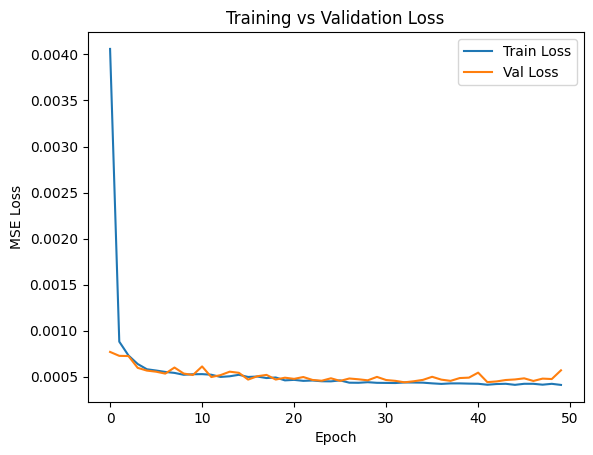

In [1]:
# Tahap 1: Pengumpulan & Pembersihan Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
file_path = '/content/KlasifikasiUTS.csv'
df = pd.read_csv(file_path)

# Cek info
print(df.info())

# Kolom target: kolom pertama bertipe int
target_col = df.select_dtypes(include='int').columns[0]
print(f"Target column: {target_col}")

# Tidak ada missing values, tapi kalau mau bersihkan:
df_clean = df.dropna()

# Tahap 2: Preprocessing
X = df_clean.drop(target_col, axis=1)
y = df_clean[target_col]

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tahap 3: Membangun Model Deep Learning
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output regresi
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Tahap 4: Training Model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Tahap 5: Evaluasi
y_pred = model.predict(X_test_scaled).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Optional: Plot loss selama training
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [2]:
# Tahap b: Feature Engineering

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load data
file_path = '/content/KlasifikasiUTS.csv'
df = pd.read_csv(file_path)

# Tentukan target column
target_col = df.select_dtypes(include='int').columns[0]
print(f"Target column: {target_col}")

# Pisahkan fitur dan target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Cek apakah ada kolom kategorikal (object)
categorical_cols = X.select_dtypes(include='object').columns.tolist()

if categorical_cols:
    print(f"Kolom kategorikal: {categorical_cols}")
    # Label Encoding untuk kategorikal
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
else:
    print("Tidak ada kolom kategorikal, Label Encoding dan One-Hot Encoding tidak dilakukan.")

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)


Target column: Class
Tidak ada kolom kategorikal, Label Encoding dan One-Hot Encoding tidak dilakukan.
Shape X_train: (227845, 30)
Shape X_test: (56962, 30)


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks

# Buat model MLP dengan teknik DL modern
def build_mlp(input_dim):
    model = tf.keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(1)  # Output untuk regresi
    ])
    return model

model = build_mlp(X_train.shape[1])

# Optimizer dengan weight decay (AdamW)
optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callbacks
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(factor=0.5, patience=5, verbose=1)

# Train
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

# Evaluasi
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}, Test MAE: {test_mae}")


Epoch 1/100
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.2798 - mae: 0.2631 - val_loss: 0.0129 - val_mae: 0.0065 - learning_rate: 0.0010
Epoch 2/100
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0122 - mae: 0.0152 - val_loss: 0.0082 - val_mae: 0.0144 - learning_rate: 0.0010
Epoch 3/100
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.0069 - mae: 0.0178 - val_loss: 0.0092 - val_mae: 0.0072 - learning_rate: 0.0010
Epoch 4/100
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0024 - mae: 0.0143 - val_loss: 0.0218 - val_mae: 0.0141 - learning_rate: 0.0010
Epoch 5/100
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.0015 - mae: 0.0089 - val_loss: 0.1412 - val_mae: 0.0185 - learning_rate: 0.0010
Epoch 6/100
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0013 - mae: 0.0053 - val_loss: 0.0893 - val_mae: 0.0122 - learning_rate: 0.0010
Epoch 7/100
2837/2849 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5738e-04 - mae: 0.0035
Epoch 7: ReduceLROnPlateau reducing 

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dataset & DataLoader
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

train_ds = TensorDataset(X_train_t, y_train_t)
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)

# MLP Model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

model = MLP(X_train.shape[1])

# Loss + optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10)

# Training loop + early stopping yang lebih stabil
best_loss = float('inf')
patience = 10
trigger_times = 0
max_epochs = 100

for epoch in range(max_epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_dl:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    scheduler.step()

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_preds = model(X_test_t)
        val_loss = criterion(val_preds, y_test_t).item()

    print(f"Epoch {epoch+1}/{max_epochs}, Train Loss: {epoch_loss/len(train_dl):.6f}, Val Loss: {val_loss:.6f}")

    # Early stopping logic: toleransi kecil terhadap fluktuasi
    if val_loss < best_loss - 1e-4:  # hanya reset jika improvement signifikan
        best_loss = val_loss
        trigger_times = 0
        best_model_wts = model.state_dict()
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

# Load best model
model.load_state_dict(best_model_wts)

# Final eval
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t).numpy().flatten()

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


Epoch 1/100, Train Loss: 0.003906, Val Loss: 0.004801
Epoch 2/100, Train Loss: 0.000825, Val Loss: 0.004562
Epoch 3/100, Train Loss: 0.000765, Val Loss: 0.003732
Epoch 4/100, Train Loss: 0.000699, Val Loss: 0.030538
Epoch 5/100, Train Loss: 0.000658, Val Loss: 0.014553
Epoch 6/100, Train Loss: 0.000626, Val Loss: 0.010847
Epoch 7/100, Train Loss: 0.000695, Val Loss: 0.000901
Epoch 8/100, Train Loss: 0.000608, Val Loss: 0.010805
Epoch 9/100, Train Loss: 0.000603, Val Loss: 0.020811
Epoch 10/100, Train Loss: 0.000579, Val Loss: 0.005701
Epoch 11/100, Train Loss: 0.000648, Val Loss: 0.009567
Epoch 12/100, Train Loss: 0.000664, Val Loss: 0.013774
Epoch 13/100, Train Loss: 0.000648, Val Loss: 0.007254
Epoch 14/100, Train Loss: 0.000625, Val Loss: 0.004475
Epoch 15/100, Train Loss: 0.000626, Val Loss: 0.005863
Epoch 16/100, Train Loss: 0.000585, Val Loss: 0.007061
Epoch 17/100, Train Loss: 0.000589, Val Loss: 0.006961
Early stopping triggered at epoch 17
MSE: 0.006960795260965824
MAE: 0.0036

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks

# MLP model function
def build_mlp(input_dim):
    model = tf.keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(1)  # Output regresi (bisa ubah untuk klasifikasi)
    ])
    return model

# Bangun model
model = build_mlp(X_train.shape[1])

# Optimizer + weight decay
optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callbacks
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(factor=0.5, patience=5, verbose=1)

# Train
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

# Evaluate
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss:.6f}, Test MAE: {test_mae:.6f}")


Epoch 1/100
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - loss: 0.3711 - mae: 0.3135 - val_loss: 0.0132 - val_mae: 0.0095 - learning_rate: 0.0010
Epoch 2/100
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0128 - mae: 0.0147 - val_loss: 0.0093 - val_mae: 0.0143 - learning_rate: 0.0010
Epoch 3/100
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0083 - mae: 0.0180 - val_loss: 0.0037 - val_mae: 0.0084 - learning_rate: 0.0010
Epoch 4/100
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0029 - mae: 0.0163 - val_loss: 0.0204 - val_mae: 0.0117 - learning_rate: 0.0010
Epoch 5/100
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0014 - mae: 0.0096 - val_loss: 0.1090 - val_mae: 0.0200 - learning_rate: 0.0010
Epoch 6/100
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0011 - mae: 0.0061 - val_loss: 0.0545 - val_mae: 0.0101 - learning_rate: 0.0010
Epoch 7/100
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 9.7746e-04 - mae: 0.0042 - val_loss: 0.1140 - val_mae: 0.016

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from torch.utils.data import TensorDataset, DataLoader

# DataLoader
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

train_ds = TensorDataset(X_train_t, y_train_t)
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)

# MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.model(x)

model = MLP(X_train.shape[1])

# Loss + optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10)

# Training loop
best_loss = float('inf')
patience = 10
trigger_times = 0
max_epochs = 100

for epoch in range(max_epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_dl:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    scheduler.step()

    model.eval()
    with torch.no_grad():
        val_preds = model(X_test_t)
        val_loss = criterion(val_preds, y_test_t).item()

    print(f"Epoch {epoch+1}/{max_epochs}, Train Loss: {epoch_loss/len(train_dl):.6f}, Val Loss: {val_loss:.6f}")

    if val_loss < best_loss - 1e-4:
        best_loss = val_loss
        trigger_times = 0
        best_model_wts = model.state_dict()
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

# Load best model
model.load_state_dict(best_model_wts)

# Final evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t).numpy().flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


Epoch 1/100, Train Loss: 0.003775, Val Loss: 0.006557
Epoch 2/100, Train Loss: 0.000872, Val Loss: 0.016473
Epoch 3/100, Train Loss: 0.000719, Val Loss: 0.000992
Epoch 4/100, Train Loss: 0.000708, Val Loss: 0.014064
Epoch 5/100, Train Loss: 0.000665, Val Loss: 0.001957
Epoch 6/100, Train Loss: 0.000660, Val Loss: 0.009423
Epoch 7/100, Train Loss: 0.000647, Val Loss: 0.003502
Epoch 8/100, Train Loss: 0.000617, Val Loss: 0.008393
Epoch 9/100, Train Loss: 0.000572, Val Loss: 0.018574
Epoch 10/100, Train Loss: 0.000598, Val Loss: 0.008586
Epoch 11/100, Train Loss: 0.000666, Val Loss: 0.004716
Epoch 12/100, Train Loss: 0.000650, Val Loss: 0.011705
Epoch 13/100, Train Loss: 0.000654, Val Loss: 0.007692
Early stopping triggered at epoch 13
MSE: 0.007691953331232071
MAE: 0.0037452545948326588
R2: -3.4786128997802734


Akurasi: 0.9993
Presisi (Macro): 0.9061
Recall (Macro): 0.8978
F1-Score (Macro): 0.9019


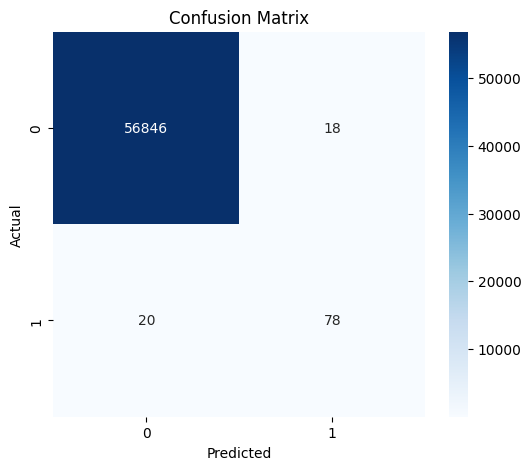

AUC Score: 0.9385


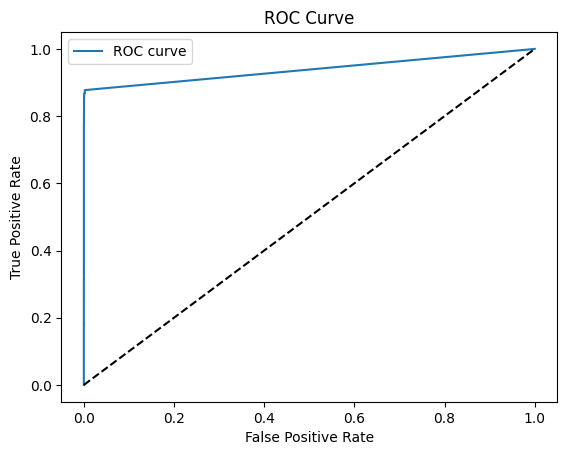

In [10]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi output ke label
y_pred_class = (y_pred > 0.5).astype(int)

# Hitung metrik
acc = accuracy_score(y_test, y_pred_class)
prec = precision_score(y_test, y_pred_class, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred_class, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_class, average='macro', zero_division=0)

print(f"Akurasi: {acc:.4f}")
print(f"Presisi (Macro): {prec:.4f}")
print(f"Recall (Macro): {rec:.4f}")
print(f"F1-Score (Macro): {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC & AUC
if len(np.unique(y_test)) > 2:
    y_test_bin = pd.get_dummies(y_test)
    auc_score = roc_auc_score(y_test_bin, y_pred, multi_class='ovr')
    print(f"AUC Score (OvR): {auc_score:.4f}")
    for i, col in enumerate(y_test_bin.columns):
        fpr, tpr, _ = roc_curve(y_test_bin.iloc[:, i], y_pred[:, i])
        plt.plot(fpr, tpr, label=f"Class {col}")
else:
    auc_score = roc_auc_score(y_test, y_pred)
    print(f"AUC Score: {auc_score:.4f}")
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label="ROC curve")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


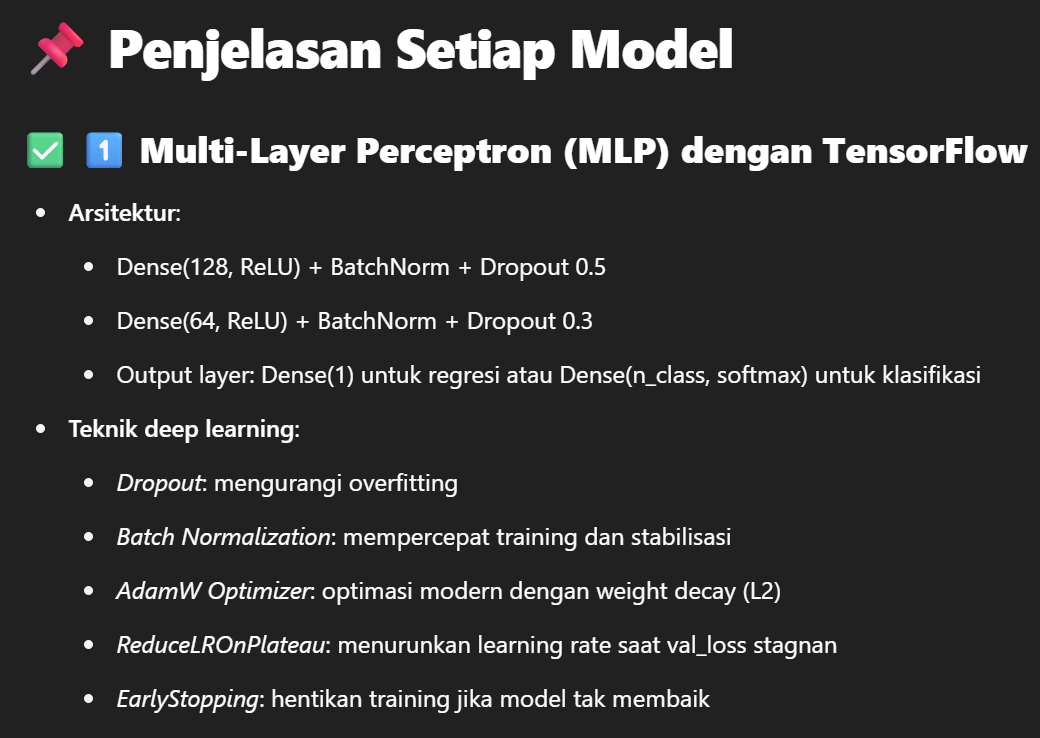

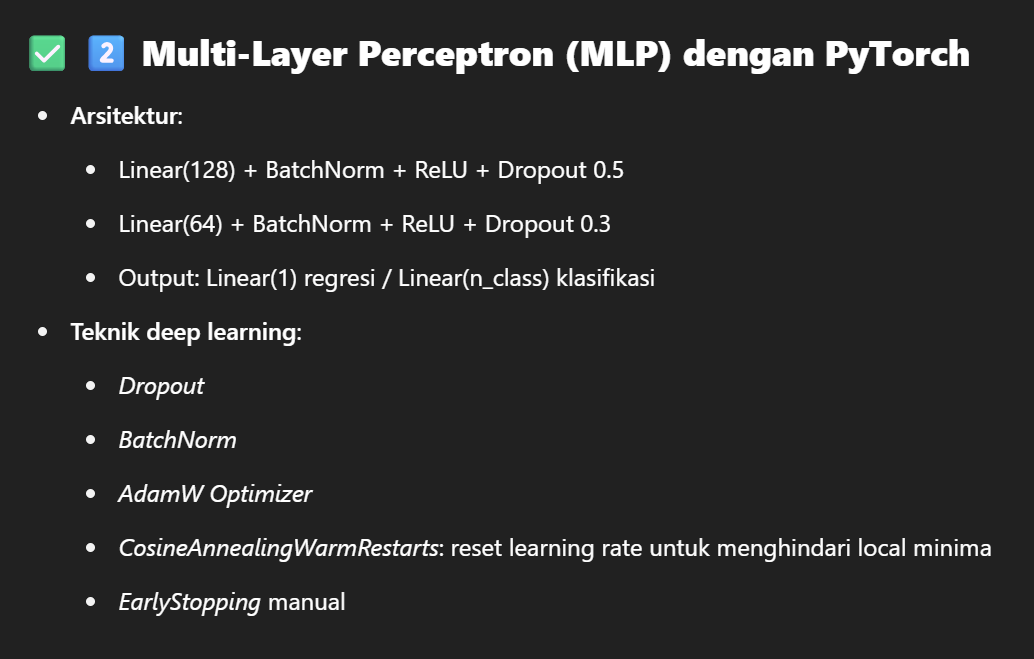